# Plot runs
This notebook plots the search algorithm curves for various search spaces.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

from monet.utils.helpers import running_avg

sys.path.append("..")
from utils.helpers import configure_seaborn, running_avg
import pandas as pd
configure_seaborn()

## NAS-Bench-201

In [5]:
df_201 = pd.read_csv("results.csv")
display(df_201.head())
print(f"There are {len(np.unique(df_201['run']))} runs")
algos = np.unique(df_201["algorithm"])

algo_dict = {e: None for e in algos}

,Unnamed: 0,algorithm,run,iteration,score
0,0,NRPA,0,0,89.56
1,1,NRPA,0,1,89.56
2,2,NRPA,0,2,89.56
3,3,NRPA,0,3,89.56
4,4,NRPA,0,4,89.56


There are 38 runs


In [6]:
for alg_name in algos:
    #Get average reward for NRPA
    df_grouped = df_201[df_201["algorithm"] == alg_name]
    algo_dict[alg_name] = df_grouped.groupby(["iteration", "run"])["score"].mean().unstack().values.T

1936


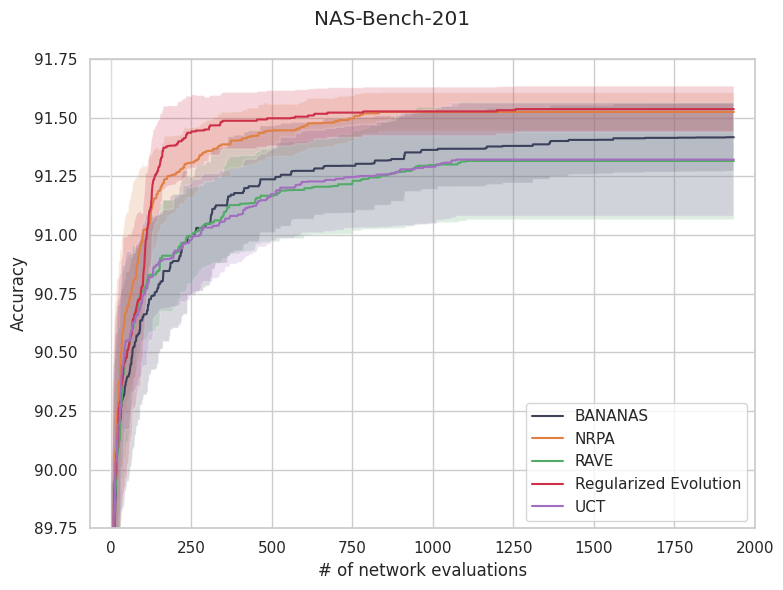

In [7]:
f, ax = plt.subplots(1,1,figsize=(8,6))
xlen = min([len(np.mean(e, axis=0),) for e in algo_dict.values()])  # Getting the minimum length of the arrays

# Setting caption dictionary
caption_dict = {
    "BANANAS": "BANANAS",
    "RE": "Regularized Evolution",
    "NRPA_L1": "NRPA - level 1",
    "NRPA_L2": "NRPA - level 2",
    "NRPA_L3": "NRPA - level 3",
    "NRPA": "NRPA",
    "UCT": "UCT",
    "RAVE": "RAVE",
    "RS": "Random Search"
}

for alg_name, values in algo_dict.items():
    mean = np.mean(values, axis=0)[:xlen]
    ax.plot(mean, label=caption_dict[alg_name])
    ax.fill_between(range(len(mean)),
                    mean+np.std(values, axis=0)[:xlen],
                    mean-np.std(values, axis=0)[:xlen],
                    alpha=0.2)

ax.set_ylabel("Accuracy"); ax.set_xlabel("# of network evaluations")
f.suptitle("NAS-Bench-201")
ax.legend()

# Set x and y axis limits
max_value = max([np.max(e) for e in algo_dict.values()])
min_value = min(np.quantile(e, 0.01) for e in algo_dict.values())
ymax = (11*max_value - min_value) / 10
plt.ylim([min_value, ymax])

print(xlen)

plt.xlim(-xlen/30, xlen+(xlen/30))
plt.tight_layout()
plt.show()


## NAS-Bench-101

,Unnamed: 0,algorithm,run,iteration,score
0,0,NRPA_L3,0,0,0.000000
1,1,NRPA_L3,0,1,0.897536
2,2,NRPA_L3,0,2,0.911959
3,3,NRPA_L3,0,3,0.914964
4,4,NRPA_L3,0,4,0.935296


There are 57 runs
[4913, 4992, 5000, 5000, 4992]
4913


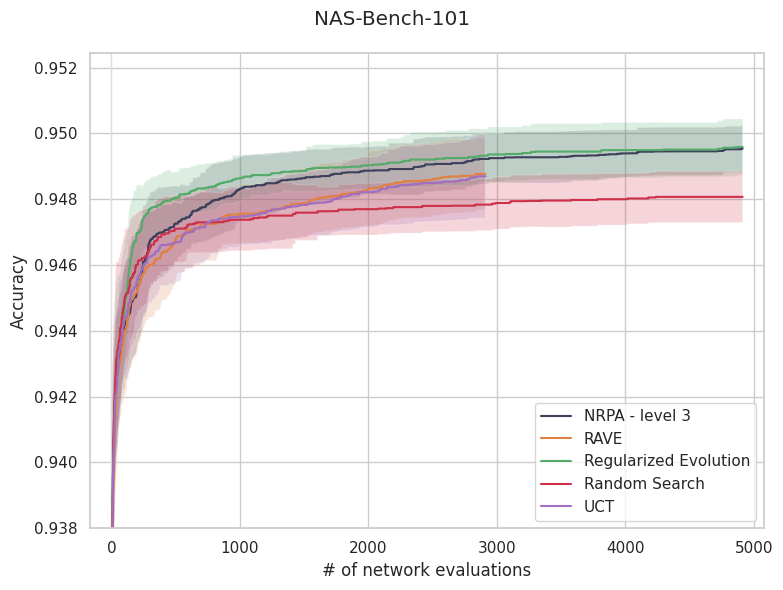

In [10]:
df_101 = pd.read_csv("nasbench101_results_upnquick.csv")
display(df_101.head())
print(f"There are {len(np.unique(df_101['run']))} runs")
algos = np.unique(df_101["algorithm"])

algo_dict = {e: None for e in algos}

for alg_name in algos:
    #Get average reward for NRPA
    df_grouped = df_101[df_101["algorithm"] == alg_name]
    algo_dict[alg_name] = df_grouped.groupby(["iteration", "run"])["score"].mean().unstack().values.T

ma = max([len(e) for e in algo_dict["UCT"]])
algo_dict["UCT"] = [np.pad(e, (0,ma-len(e)), mode='maximum') for e in algo_dict["UCT"]]
ma = max([len(e) for e in algo_dict["RAVE"]])
algo_dict["RAVE"] = [np.pad(e, (0,ma-len(e)), mode='maximum') for e in algo_dict["RAVE"]]

f, ax = plt.subplots(1, 1, figsize=(8, 6))
xlen = min([len(np.mean(e, axis=0), ) for e in algo_dict.values()])  # Getting the minimum length of the arrays
print([len(np.mean(e, axis=0), ) for e in algo_dict.values()])

# Setting caption dictionary
caption_dict = {
    "BANANAS": "BANANAS",
    "RE": "Regularized Evolution",
    "NRPA_L1": "NRPA - level 1",
    "NRPA_L2": "NRPA - level 2",
    "NRPA_L3": "NRPA - level 3",
    "NRPA": "NRPA",
    "UCT": "UCT",
    "RAVE": "RAVE",
    "RS": "Random Search"
}

for alg_name, values in algo_dict.items():
    mean = np.mean(values, axis=0)[:xlen]
    ax.plot(mean, label=caption_dict[alg_name])
    ax.fill_between(range(len(mean)),
                    mean + np.std(values, axis=0)[:xlen],
                    mean - np.std(values, axis=0)[:xlen],
                    alpha=0.2)

ax.set_ylabel("Accuracy");
ax.set_xlabel("# of network evaluations")
f.suptitle("NAS-Bench-101")
ax.legend()

# Set x and y axis limits
max_value = max([np.max(e) for e in algo_dict.values()])
min_value = min(np.quantile(e, 0.01) for e in algo_dict.values())
ymax = (11 * max_value - min_value) / 10
plt.ylim([0.938, ymax])

print(xlen)

plt.xlim(-xlen / 30, xlen + (xlen / 30))
plt.tight_layout()
plt.show()


In [13]:
print(np.mean(algo_dict["NRPA_L3"], axis=0)[:-10])

[0.83818671 0.92191366 0.9282097  ... 0.94951923 0.94951923 0.94951923]
